In [ ]:
!pip install ipympl
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
from sklearn.metrics import mean_squared_error
import ipympl

In [ ]:
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
img = io.imread("/content/drive/MyDrive/Semester 8/Computer Vision/HW/1/Lena.bmp") # (512, 512, 3)
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
img_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B

In [ ]:
m,n = img_gray.shape

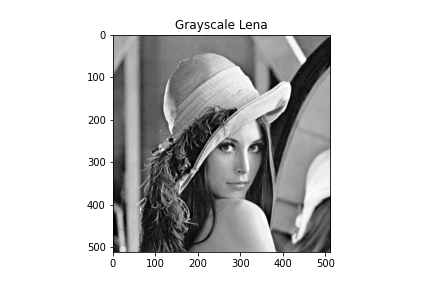

In [ ]:
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Lena")
plt.show()

#1.1 


Display the quantized image in (4,8,64,128) levels and also the optimum mean square error obtained for each case on gray scale Lena image. Note that you can only use rgb2gray, mean-square-error functions for this problem.

##4 level

In [ ]:
def four_level(data):
  if 0<=data<85:
    return 0
  elif 85<=data<170:
    return 85
  elif 170<=data<255:
    return 170
  elif data == 255:
    return 255

In [ ]:
image_4 = np.zeros(shape=(512,512))
for i in range(512):
  for j in range(512):
    image_4[i][j] = four_level(img_gray[i][j])

In [ ]:
mean_squared_error(img_gray,image_4)

2371.465281372514

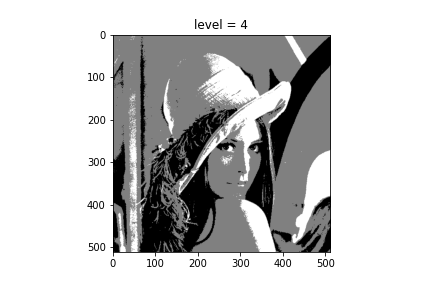

In [ ]:
plt.imshow(image_4, cmap='gray')
plt.title("level = 4")
plt.show()

##8 level

In [ ]:
def eight_level(data):
  for i in range(0,5):
    if i*36<=data<(i+1)*36:
      return i*36
  if data<=255:
    return 255

In [ ]:
image_8 = np.zeros(shape=(512,512))
for i in range(512):
  for j in range(512):
    image_8[i][j] = eight_level(img_gray[i][j])

In [ ]:
mean_squared_error(img_gray,image_8)

717.5468367252954

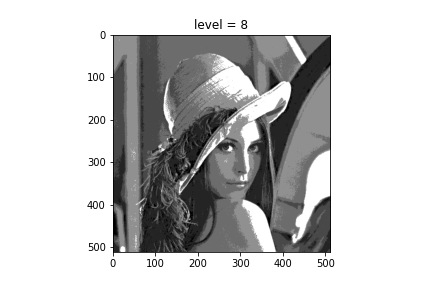

In [ ]:
plt.imshow(image_8, cmap='gray')
plt.title("level = 8")
plt.show()

##16 level

In [ ]:
def level_64(data):
  for i in range(0,62):
    if i*4<=data<(i+1)*4:
      return i*4
  return 255

In [ ]:
image_64 = np.zeros(shape=(512,512))
for i in range(512):
  for j in range(512):
    image_64[i][j] = level_64(img_gray[i][j])

In [ ]:
mean_squared_error(img_gray,image_64)

5.147733850539581

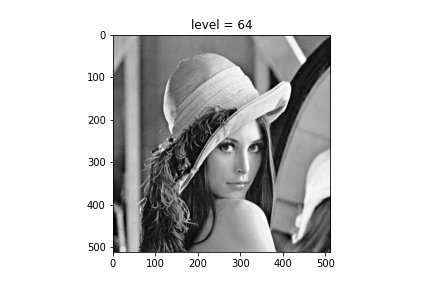

In [ ]:
plt.imshow(image_64, cmap='gray')
plt.title("level = 64")
plt.show()

##128 level

In [ ]:
def level_128(data):
  for i in range(0,126):
    if i*2<=data<(i+1)*2:
      return i*2
  return 255

In [ ]:
image_128 = np.zeros(shape=(512,512))
for i in range(512):
  for j in range(512):
    image_128[i][j] = level_128(img_gray[i][j])

In [ ]:
mean_squared_error(img_gray,image_128)

1.3593463703760076

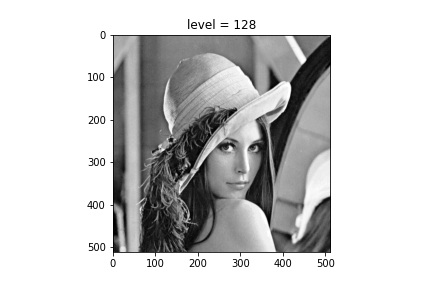

In [ ]:
plt.imshow(image_128, cmap='gray')
plt.title("level = 128")
plt.show()

#1.2

Create new images using 6,4,2,1 bit only for each pixel discuss the results using mean square error on gray scale Lena. Currently the piture is 8 bit.

##6 bit
To turn an 8-bit number to a 6-bit one, we have to shift it 2 bits to right.

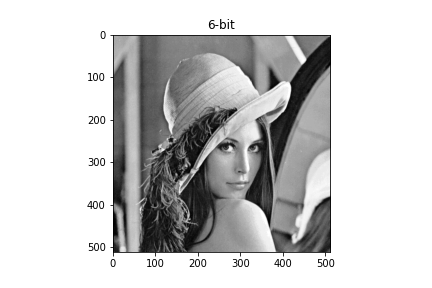

In [73]:
image_6_bit = np.uint64(img_gray) >> np.uint64(2)
plt.imshow(image_6_bit, cmap='gray')
plt.title("6-bit")
plt.show()

In [63]:
mean_squared_error(img_gray, image_6_bit)

9556.515354010457

##4-bit

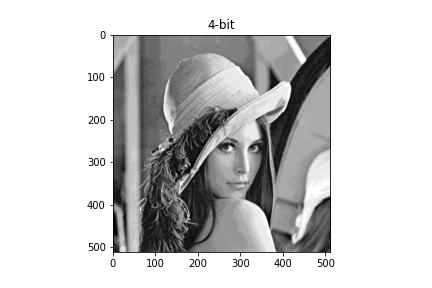

In [60]:
image_4_bit = np.uint64(img_gray) >> np.uint64(4)
plt.imshow(image_4_bit, cmap='gray')
plt.title("4-bit")
plt.show()

In [62]:
mean_squared_error(img_gray, image_4_bit)

14907.416857999871

##2-bit

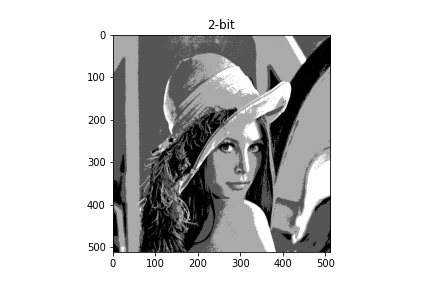

In [66]:
image_2_bit = np.uint64(img_gray) >> np.uint64(6)
plt.imshow(image_2_bit, cmap='gray')
plt.title("2-bit")
plt.show()

In [74]:
mean_squared_error(img_gray, image_2_bit)

16420.778882439106

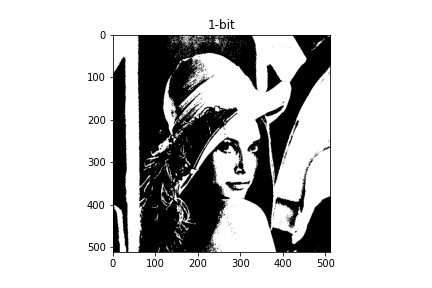

In [67]:
image_1_bit = np.uint64(img_gray) >> np.uint64(7)
plt.imshow(image_1_bit, cmap='gray')
plt.title("1-bit")
plt.show()

In [75]:
mean_squared_error(img_gray, image_1_bit)

16676.873322240877

#1.3

By using point processing create new images to make it Darken, Lighten, Lower contrast, raised contrast and finally Invert image and display the results on gray scale Lena.

##Darken

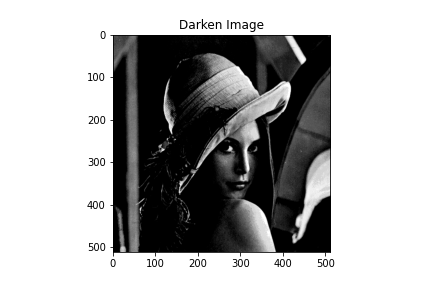

In [68]:
darken_img = np.zeros(shape=(m,n))

for i in range(0, m):
  for j in range(0, n):
    if img_gray[i][j] - 128 < 0:
      darken_img[i][j] = 0
    else:
      darken_img[i][j] = img_gray[i][j] - 128

plt.imshow(darken_img, cmap='gray')
plt.title("Darken Image")
plt.show()

##Lighten

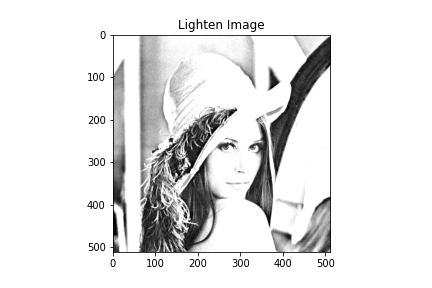

In [69]:
lighten_img = np.zeros(shape=(512,512))
for i in range(0, m):
  for j in range(0, n):
    if img_gray[i][j] + 128 > 255:
      lighten_img[i][j] = 255
    else:
      lighten_img[i][j] = img_gray[i][j] + 128

plt.imshow(lighten_img, cmap='gray')
plt.title("Lighten Image")
plt.show()

##Lower Contrast

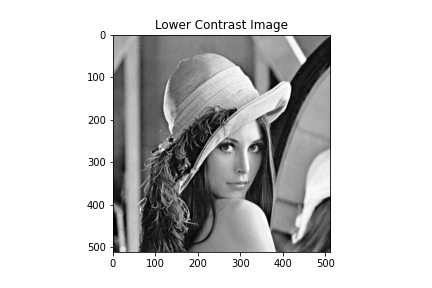

In [70]:
low_cont_img = np.zeros((m,n))
for i in range(0, m):
  for j in range(0, n):
    low_cont_img[i][j] = img_gray[i][j] / 2

plt.imshow(low_cont_img, cmap='gray')
plt.title("Lower Contrast Image")
plt.show()

##Raised Contrast

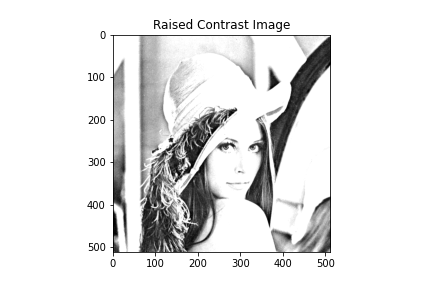

In [71]:
raise_cont_img = np.zeros((m,n))
for i in range(0, m):
  for j in range(0, n):
    if img_gray[i][j] * 2 > 255 :
      raise_cont_img[i][j] = 255
    else:
      raise_cont_img[i][j] = img_gray[i][j] * 2

plt.imshow(raise_cont_img, cmap='gray')
plt.title("Raised Contrast Image")
plt.show()

##Invert Image

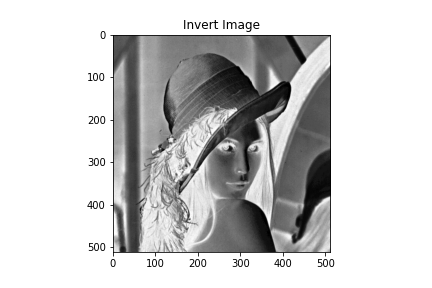

In [76]:
invert_img = np.zeros((m,n))
for i in range(0, m):
  for j in range(0, n):
      invert_img[i][j] = 255 - img_gray[i][j]

plt.imshow(invert_img, cmap='gray')
plt.title("Invert Image")
plt.show()